# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Ramadhan Prinada
- **Email:** ramadhanpmuhammad@gmail.com
- **ID Dicoding:** ramadhanprinada

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca mempengaruhi jumlah penyewaan sepeda?
- Bagaimana tren penggunaan sepeda berdasarkan kategori pengguna (workingday vs non-workingday)?

## Import Semua Packages/Library yang Digunakan

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [80]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [81]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day.csv berisi data agregat harian, sedangkan hour.csv berisi data per jam
- casual dan registered menunjukkan perbedaan jumlah penyewaan antara pengguna tidak terdaftar dan pengguna terdaftar
- cuaca (weathersit) dan faktor waktu (seperti hari kerja/libur dan jam) dapat mempengaruhi jumlah total penyewaan sepeda (cnt)

### Assessing Data

In [82]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [83]:
day_df.isna().sum() # menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [84]:
print("Jumlah duplikasi: ", day_df.duplicated().sum()) # memeriksa jumlah duplikasi data

Jumlah duplikasi:  0


In [85]:
day_df.describe() # menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada sebuah DataFrame

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [86]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [87]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [88]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum()) # memeriksa jumlah duplikasi data

Jumlah duplikasi:  0


In [89]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- tidak adanya missing value dari kedua table
- tidak adanya jumlah duplikat dari kedua table
- tidak ada innacurate value

### Cleaning Data

**Insight:**
- data aman tidak ada yang perlu di cleaning

## Exploratory Data Analysis (EDA)

### Explore ...

In [90]:
day_df['season'].value_counts() # Cek distribusi season dan weather di dataset harian

,count
season,
3,188
2,184
1,181
4,178


In [91]:
day_df['weathersit'].value_counts() # Cek distribusi weather di dataset

,count
weathersit,
1,463
2,247
3,21


In [92]:
hour_df['season'].value_counts()

,count
season,
3,4496
2,4409
1,4242
4,4232


In [93]:
hour_df['weathersit'].value_counts()

,count
weathersit,
1,11413
2,4544
3,1419
4,3


In [94]:
# cek rentang waktu
print("Harian: ", day_df['dteday'].min(), day_df['dteday'].max())
print("Jam: ", hour_df['dteday'].min(), hour_df['dteday'].max())

Harian:  2011-01-01 2012-12-31
Jam:  2011-01-01 2012-12-31


In [95]:
# cek korelasi
# menghitung korelasi hanya untuk kolom numerik di dataset harian
numeric_cols_day = day_df.select_dtypes(include=['float64', 'int64'])
print(numeric_cols_day.corr())
# menghitung korelasi hanya untuk kolom numerik di dataset per jam
numeric_cols_hour = hour_df.select_dtypes(include=['float64', 'int64'])
print(numeric_cols_hour.corr())

             instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp        0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp       0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum         0.016375  0.205445 -0.110651  0.222204 -0.015937 -0.052232   
windspeed  -0.112620 -0.229046 -0.011817 -0.207502  0.006292  0.014282   
casual      0.275255  0.210399  0.2485

In [96]:
# deteksi outlier di dataset harian
print(day_df[['casual', 'registered', 'cnt']].describe())

# deteksi outlier di dataset per jam
print(hour_df[['casual', 'registered', 'cnt']].describe())

            casual   registered          cnt
count   731.000000   731.000000   731.000000
mean    848.176471  3656.172367  4504.348837
std     686.622488  1560.256377  1937.211452
min       2.000000    20.000000    22.000000
25%     315.500000  2497.000000  3152.000000
50%     713.000000  3662.000000  4548.000000
75%    1096.000000  4776.500000  5956.000000
max    3410.000000  6946.000000  8714.000000
             casual    registered           cnt
count  17379.000000  17379.000000  17379.000000
mean      35.676218    153.786869    189.463088
std       49.305030    151.357286    181.387599
min        0.000000      0.000000      1.000000
25%        4.000000     34.000000     40.000000
50%       17.000000    115.000000    142.000000
75%       48.000000    220.000000    281.000000
max      367.000000    886.000000    977.000000


In [97]:
# Cek jumlah penyewaan berdasarkan tahun di dataset harian
print(day_df.groupby('yr')['cnt'].sum())

# Cek jumlah penyewaan berdasarkan tahun di dataset per jam
print(hour_df.groupby('yr')['cnt'].sum())

yr
0    1243103
1    2049576
Name: cnt, dtype: int64
yr
0    1243103
1    2049576
Name: cnt, dtype: int64


In [98]:
# Frekuensi penyewaan berdasarkan jam
print(hour_df.groupby('hr')['cnt'].mean())

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


**Insight:**
- Korelasi Suhu dan Penyewaan, menunjukkan bahwa suhu yang lebih tinggi meningkatkan penggunaan sepeda.
- Musim tertentu, terutama musim panas, menunjukkan jumlah penyewaan yang lebih tinggi.

## Visualization & Explanatory Analysis

In [113]:
all_df = pd.merge(day_df, hour_df, on='dteday', how='inner')
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Pertanyaan 1: Bagaimana cuaca mempengaruhi jumlah penyewaan sepeda?

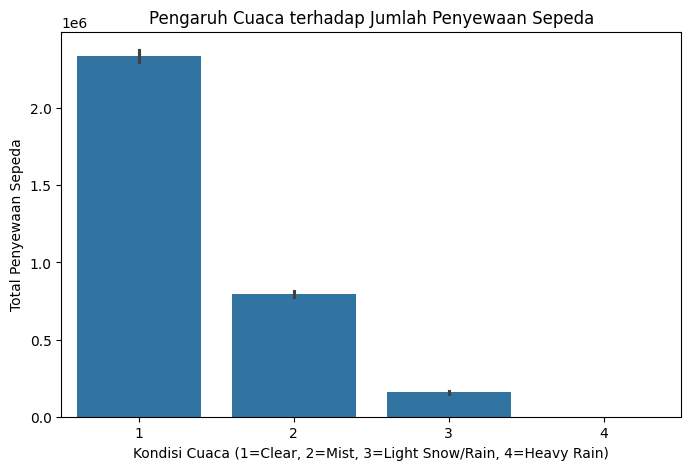

In [114]:
# Bar Chart jumlah penyewaan sepeda berdasarkan kondisi cuaca (weathersit_y)
plt.figure(figsize=(8, 5))
sns.barplot(data=all_df, x='weathersit_y', y='cnt_y', estimator=sum)
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca (1=Clear, 2=Mist, 3=Light Snow/Rain, 4=Heavy Rain)')
plt.ylabel('Total Penyewaan Sepeda')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


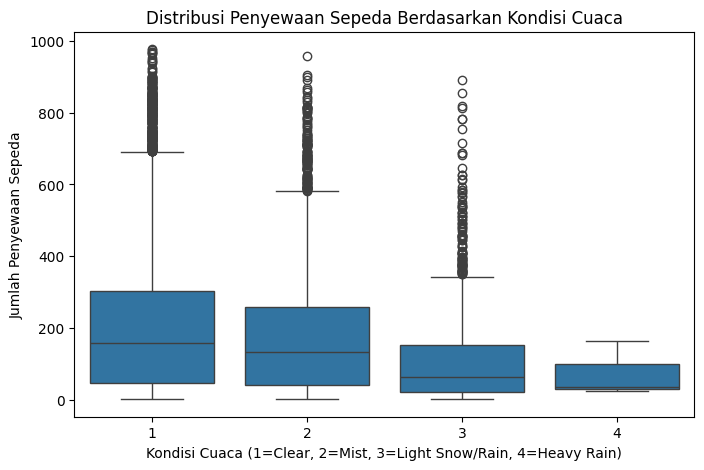

In [115]:
# Box Plot penyewaan sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(8, 5))
sns.boxplot(data=all_df, x='weathersit_y', y='cnt_y')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1=Clear, 2=Mist, 3=Light Snow/Rain, 4=Heavy Rain)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

### Pertanyaan 2: Bagaimana tren penggunaan sepeda berdasarkan kategori pengguna (workingday vs non-workingday)?

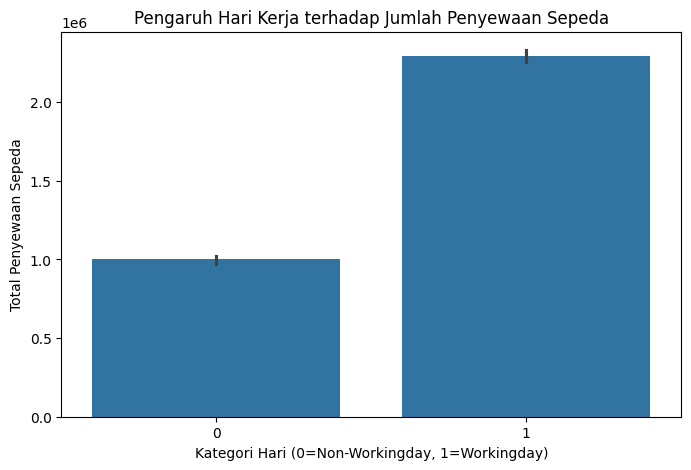

In [116]:
# Bar Chart: Penyewaan sepeda berdasarkan kategori hari kerja
plt.figure(figsize=(8, 5))
sns.barplot(data=all_df, x='workingday_y', y='cnt_y', estimator=sum)
plt.title('Pengaruh Hari Kerja terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kategori Hari (0=Non-Workingday, 1=Workingday)')
plt.ylabel('Total Penyewaan Sepeda')
plt.show()

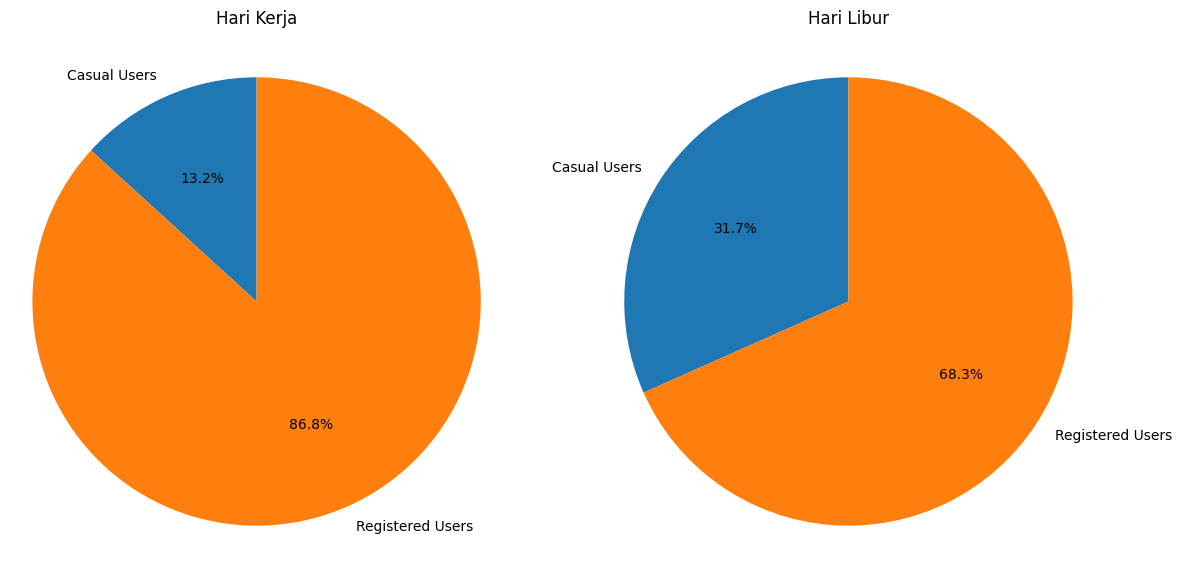

In [119]:
import matplotlib.pyplot as plt

# Filter data untuk hari kerja
workingday_data = all_df[all_df['workingday_y'] == 1]
# Total pengguna kasual dan terdaftar pada hari kerja
casual_workingday = workingday_data['casual_y'].sum()
registered_workingday = workingday_data['registered_y'].sum()

# Filter data untuk hari libur
non_workingday_data = all_df[all_df['workingday_y'] == 0]
# Total pengguna kasual dan terdaftar pada hari libur
casual_non_workingday = non_workingday_data['casual_y'].sum()
registered_non_workingday = non_workingday_data['registered_y'].sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart untuk hari kerja
ax1.pie([casual_workingday, registered_workingday], labels=['Casual Users', 'Registered Users'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Hari Kerja')
ax1.axis('equal')  # Membuat pie chart berbentuk lingkaran

# Pie chart untuk hari libur
ax2.pie([casual_non_workingday, registered_non_workingday], labels=['Casual Users', 'Registered Users'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Hari Libur')
ax2.axis('equal')  # Membuat pie chart berbentuk lingkaran

plt.show()

**Insight:**
- cuaca yang cerah menunjukan tingginya penyewa sepeda
- bar chart menunjukkan jumlah penyewaan sepeda bervariasi antara hari kerja dan hari libur.
- pie chart pengguna casual banyak menyewa sepeda pada hari libur, sedangkan pengguna registered lebih banyak menggunakan sepeda pada hari kerja.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1

cuaca memiliki dampak signifikan terhadap jumlah penyewaan sepeda, dengan peningkatan penyewaan yang terlihat pada suhu yang lebih hangat dan kondisi cuaca yang lebih baik.

- Conclution pertanyaan 2

penggunaan sepeda meningkat pada hari kerja, terutama di kalangan pengguna registered, yang menunjukkan peran sepeda sebagai moda transportasi sehari-hari.

di hari libur, pengguna casual cenderung menyewa lebih banyak sepeda

analisis menunjukkan potensi untuk meningkatkan penggunaan sepeda dengan mengedukasi pengguna tentang manfaat bersepeda di hari kerja dan mengoptimalkan layanan sepeda sesuai dengan pola cuaca.

In [120]:
all_df.to_csv("all_data.csv", index=False)